In [2]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import csv

In [17]:
with open('Linear.csv','w',newline = '')as f:
    thewriter = csv.writer(f)

In [3]:
data1 = pd.read_csv('Linear.csv')
df = data1
data1

,Exam_Score,Revision_Time
0,94,80.0
1,88,60.0
2,71,56.0
3,75,47.0
4,71,43.0
5,68,40.0
6,73,67.0
7,57,16.0
8,59,21.0
9,65,54.0


In [4]:
x = data1['Exam_Score']
y = data1['Revision_Time']

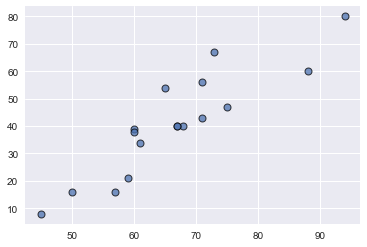

In [5]:
plt.scatter(x,y, cmap = 'Reds',edgecolor = 'black',
            linewidth = 1,alpha = .75) #s:changes size,c:changes colour

In [6]:
                             # Pearson correlation -1 to 1
import numpy as np
r = np.corrcoef(x,y)
r #0.89929283 is strong

array([[1.        , 0.89929283],
       [0.89929283, 1.        ]])

In [7]:
                               # Sample correlation process
def rcorrelation(x,y):
    v = np.cov(x,y)
    total_covariance = v[0][1] #covariance  
    # standard dev of x
    sx = np.std(x,ddof = 1) #ddof takes away the population version
    sy= np.std(y,ddof = 1)
    # standard deviation of both x and y
    total_std = sx*sy
    total_std
    # sample Correlation result
    samplecorr = round(total_covariance/total_std,2)
    return samplecorr
rcorrelation(x,y)

0.9

In [8]:
                         # Testing the signifience of the Sample Correlation
#1 Hypothesis testingh h(null):r=0, h(a): r!=0
#2 Signifience Level: alpha = 0.05
#3 Test statistic use formula: two different methods
#   1: using p-value to compare with sig level = pvalue < alpha
#   2: using critical value to compare sig level= critical value of t-test > critical value of alpha

In [9]:
                       # Test statistic and critical value: Method 1
#t-test func
def ttest_endtail(r,n,alpha,ntail):
    top = r-0
    bot1 = 1-r**2
    bot2 = n-2
    bot3 = bot1/bot2
    bot4 = round(bot3**.5,2)
    total = round(top/bot4,2)
    # divide alpha by 2
    endtail = 0.5/2
    return total,endtail
ttest_endtail(.9,17,.05,2)
tt = 8.18
endtail = .25

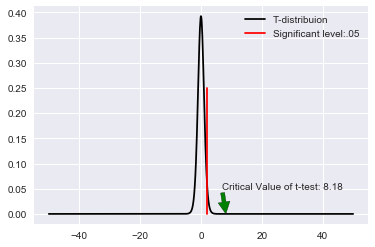

In [10]:
                             # Make a t-distribuion 
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import norm

# function for t-dis
def tgraph(n,alpha,ntails,endtail):
    domain= np.linspace(-50,50,1000)
    dof  = n-1#degress of freedom (sample size minues 1)
    ## Calculate critical value of alpha 
    tcrit = round(abs(st.t.ppf(alpha/ntails, dof)),3)#2.131

    plt.figure()
    plt.plot(domain, st.t.pdf(domain,dof),'k',label ='T-distribuion'  )

    ## Plot some vertical lines representing critical t-score cutoff
    sig_tails = np.linspace(0,endtail)
    x1 = len(sig_tails) * [tcrit]
    x2 = len(sig_tails) * [-tcrit]
    plt.plot(x1,sig_tails,'r',label="Significant level:.05")
    plt.annotate('Critical Value of t-test: 8.18',xytext=(7,.05),xy=(tt,0),arrowprops={'facecolor':'green'})
    plt.legend()
tgraph(17,.05,2,.25)

In [11]:
                             # P-Value: Method 2
pval = st.t.sf(np.abs(tt),17-1)*2
pval   

4.150018615981268e-07

In [12]:
#convert to decimal
"{:.10f}".format(float("1.2678715297879369e-06")) #0.000 <0.05

'0.0000012679'

In [13]:
                           # Building the Model
xmean = np.mean(x)
ymean = np.mean(y)

num = 0
den = 0

for i in range(len(x)):
    num += (x[i] - xmean)*(y[i]-ymean)
    den += (x[i] - xmean)**2
m = round(num/den,0)
c = round(ymean - m*xmean,0)
print(m,c)

1.0 -25.0


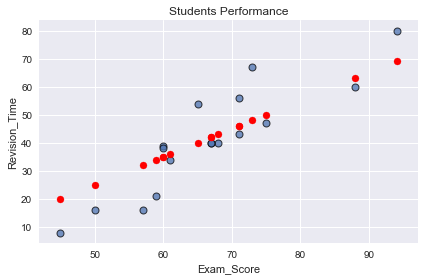

In [18]:
                           # Plotting the model
regression = m*x + c
plt.scatter(x,y,edgecolor = 'black',
            linewidth = 1,alpha = .75) 
plt.scatter(x,regression,color = 'red')
plt.title('Students Performance')
plt.xlabel('Exam_Score')
plt.ylabel('Revision_Time')
plt.tight_layout()


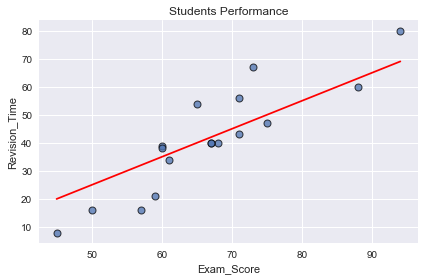

In [19]:
                         # Regression Line
plt.scatter(x,y,edgecolor = 'black',
            linewidth = 1,alpha = .75) 
plt.plot([min(x), max(x)], [min(regression), max(regression)], color='red')
plt.title('Students Performance')
plt.xlabel('Exam_Score')
plt.ylabel('Revision_Time')
plt.tight_layout()

In [20]:
                               # Estimating Error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data1.describe() #statistical details of the dataset

,Exam_Score,Revision_Time
count,17.000000,17.000000
mean,66.529412,41.117647
std,12.181531,19.032480
min,45.000000,8.000000
25%,60.000000,34.000000
50%,67.000000,40.000000
75%,71.000000,54.000000
max,94.000000,80.000000


In [21]:
for i in x:
    pred_y =round((1.4050592141122842*x) + -52.36011595064668,0)
pred_y

0     80.0
1     71.0
2     47.0
3     53.0
4     47.0
5     43.0
6     50.0
7     28.0
8     31.0
9     39.0
10    42.0
11    32.0
12    32.0
13    11.0
14    33.0
15    18.0
16    42.0
Name: Exam_Score, dtype: float64

In [22]:
                            # Standard Error of the Estimate used in Regression Analysis 
total = 0
for i in range(17):
    total+=((y[i]-pred_y[i])**2)
total

1128.0

In [25]:
new_regression = m*x + c + error
new2 = m*x +c + 6
new3 = m*x +c + 4
new4 = m*x +c +2
new5 = m*x +c -1
new6 = m*x +c -3

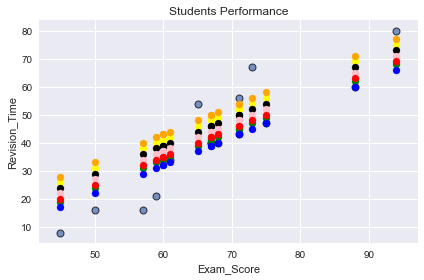

In [26]:
                            # New Regression line
plt.scatter(x,y,edgecolor = 'black',
            linewidth = 1,alpha = .75) 
plt.scatter(x,new2,color = 'yellow')
plt.scatter(x,new_regression,color = 'orange')
plt.scatter(x,new3,color = 'black')
plt.scatter(x,new5,color = 'green')
plt.scatter(x,new4,color = 'pink')
plt.scatter(x,new6,color = 'blue')
plt.scatter(x,regression,color = 'red')

plt.title('Students Performance')
plt.xlabel('Exam_Score')
plt.ylabel('Revision_Time')
plt.tight_layout()

In [24]:
n= len(y)
error = round((total/n-2)**.5,0)
error

8.0

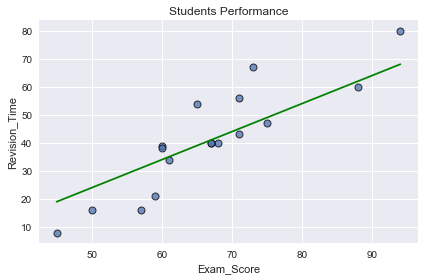

In [98]:
plt.scatter(x,y,edgecolor = 'black',
            linewidth = 1,alpha = .75) 
#plt.plot([min(x), max(x)], [min(new_regression), max(new_regression)], color='orange')
#plt.plot([min(x), max(x)], [min(new2), max(new2)], color='yellow')
#plt.plot([min(x), max(x)], [min(regression), max(regression)], color='red')
#plt.plot([min(x), max(x)], [min(new3), max(new3)], color='black')
#plt.plot([min(x), max(x)], [min(new4), max(new4)], color='pink')
plt.plot([min(x), max(x)], [min(new5), max(new5)], color='green')
#plt.plot([min(x), max(x)], [min(new6), max(new6)], color='blue')

plt.title('Students Performance')
plt.xlabel('Exam_Score')
plt.ylabel('Revision_Time')
plt.tight_layout()

In [53]:
                                 #Goodness of fit
# Checking assumptions with Residual
# R2 = R-squared is a statistical measure of how close the data are to the fitted regression line. 
#      It is also known as the coefficient of determination, or the coefficient of multiple determination 
# Chi-squared test

In [74]:
                                # Calculating R2
def r2(observed,expected):
    correlation_matrix= np.corrcoef(observed,expected)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2.
    print(r_squared)
r2(y,regression)

0.8087276012049545


In [75]:
r2(y,new_regression)

0.8087276012049545


In [76]:
r2(y,new2)

0.8087276012049545


In [77]:
r2(y,new3)

0.8087276012049545


In [79]:
r2(y,new4)

0.8087276012049545


In [78]:
r2(y,new5)

0.8087276012049545


In [80]:
r2(y,new6)

0.8087276012049545


In [27]:
                                          # Calculating Chi-Squared
def x2(observed,expected):
    total = 0
    for i in range(17):
        total+=(observed[i]-expected[i])**2/expected[i]
    print(total)
regression_x2 = x2(y,regression)

41.502642458736105


In [28]:
new_regression_x2 = x2(y,new_regression)

66.67489917379481


In [29]:
new2_x2=x2(y,new2)

56.98204920970884


In [30]:
new3_x2 = x2(y,new3)

49.35367266835597


In [31]:
new4_x2 = x2(y,new4)

44.07796798586588


In [32]:
new5_x2 = x2(y,new5)

41.35670364941712


In [33]:
new6_x2 = x2(y,new6)

43.65859315301399


In [42]:
#Finding the p-value of chi-squared
x2=[41.502642458736105,66.67489917379481,56.98204920970884,49.35367266835597,44.07796798586588,41.35670364941712,
    43.65859315301399]
for i in x2:
    print(round(i/1000,3))#0.041 is the smallest p-value .041<.05

0.042
0.067
0.057
0.049
0.044
0.041
0.044


In [1]:
                              # Checking assumptions with Residual
#1.Linearity
#2.Homoscedasticity
#3.Independence of errors
#4.Normality of error distrubtion